# Concolutional Neural Network(CNN)
## Neural Network(신경망)
: 인공지능에서 기본 개념으로 사용되는 인공신경망 뉴런은 생물학적 뉴련을 수학적으로 모델리한 것입니다. 
- 뉴런은 여러 입력값을 받아 일정 수준을 넘어서게 되면 활성화되고 출력값을 내보냅니다. 



# Activation Function(활성화 함수)

## Sigmoid(시그모이드)
뉴런이 여러 입력값을 받아 일정 수준을 넘어서게 되고, 활성화되어 출력값을 내볼낼 때 사용하는 함수
- 시그모이드, 렐루, 소프트맥스 등등 여러 활성화 함수가 있습니다.  
- 시그모이드 함수(활성화)는 보통 0.5 미만은 0, 이상은 1을 출력하게 됩니다.
- 시그모이드 함수의 식 : $sigmoid(x) = \frac{1}{1+exp^-t}$
- 시그모이드 함수의 그래프 :

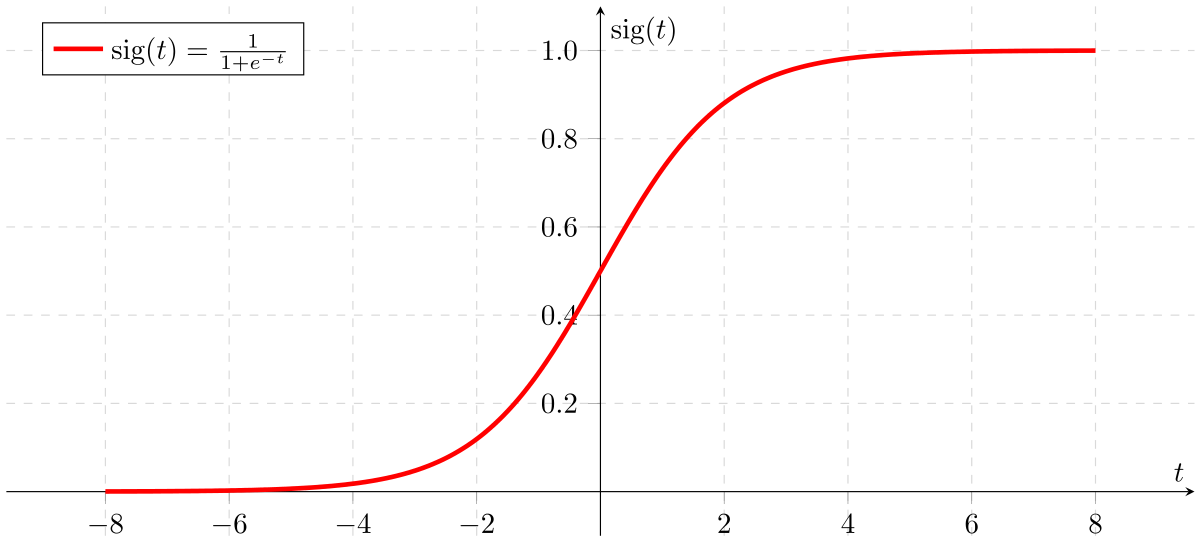
[이미지출처](https://commons.wikimedia.org/wiki/File:Sigmoid-function-2.svg)


시그모이드 함수의 그래프를 확인해보면 양 극단 값의 기울기(미분값)이 0에 가까워지기 때문에 학습이 되지 않는 문제가 발생합니다.
- 이 문제를 Gradient Vanishing(기울기 소실)문제라고 합니다.  

## ReLU(렐루)
위에서 이야기한 Gradient Vanishing(기울기 소실)문제를 해결하기 위해 등장한 함수가 렐루 함수입니다.  
-렐루 함수 : $ReLU(x) = 0\;if\;x < 0\;else\;max(0, x)$
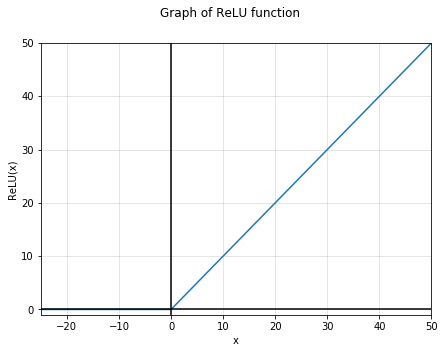

- 렐루 함수는 입력값을 0과 비교해 둘중 큰 값을 출력합니다.
- 그러나 음수인 경우에는 0을 출력하여 학습이 이루어지지 않는다는 단점이 존재합니다.

# Peceptron(퍼셉트론)
퍼셉트론이란 신경망의 기원이 되는 개념으로 여러 신호를 입력받아 0(흐르지 않는다) 또는 1(흐른다)이라는 출력값을 앞으로 전달합니다.  
각 입력 신호 x는 각 가중치 w와 곱해집니다. 가중치가 클수록 그 신호가 중요하다는 의미입니다.  
그러나 퍼셉트론은 단순 선형 분류기로 AND, OR과 같은 분류는 가능하나 XOR 분류는 불가능합니다.  
- XOR 문제
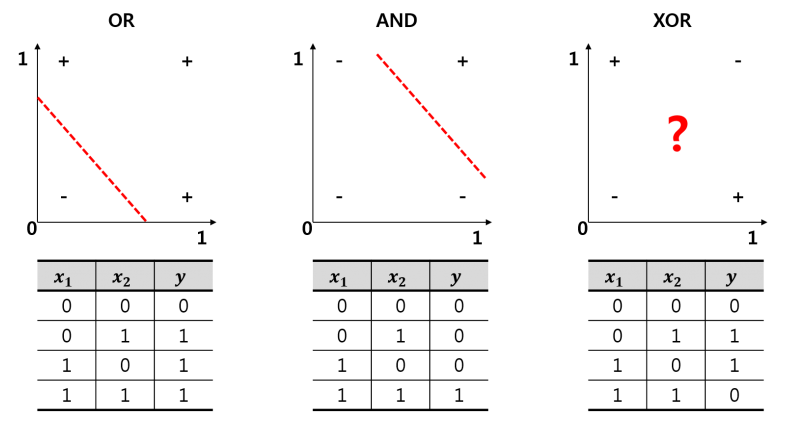
[이미지출처](https://m.blog.naver.com/timeless947/222068596935)

위의 그래프에 나오는 XOR 문제처럼 점들이 주어진다면 하나의 선으로 올바르게 분류하지 못하게 됩니다.

# MLP - Multi Layer Perceptron (다층 퍼셉트론)
XOR문제를 해결하기 위해 고안된것이 바로 다층 퍼센트론입니다.
- 좌표평면 자체가 하나의 종이라고 생각할 때 그 종이를 휘어주어서 좌표평면에 변화를 주어 XOR문제를 해결한 것입니다.
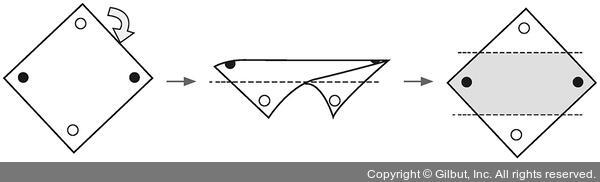
[출처](https://ang-love-chang.tistory.com/26)
또한 두개의 퍼셉트론을 한번에 계산하기 위하여 은닉층(Hidden Layer)을 만들어줍니다.  
위의 블로그에 들어가보면 더 자세한 내용을 알 수 있습니다.

In [2]:
#라이브러리 로드 
import os
import warnings
warnings.filterwarnings('ignore')

#GPU할당
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [18]:
from glob import glob
import numpy as np
import PIL
from PIL import Image

train_path = "C:/Users/User/Desktop/DataScience/data/object_image_classification_data/train/"
test_path = "C:/Users/User/Desktop/DataScience/data/object_image_classification_data/test/"
sub_path = "C:/Users/User/Desktop/DataScience/data/object_image_classification_data/"

In [19]:
def load_train(path):
    images = []
    labels = []
    for file_name in glob(path + "*"):
        for img in glob(file_name + "/*.jpg"):
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to traing_images
            label = file_name.split("train\\")[1] #get label
            labels.append(label) # append label
    images = np.array(images)
    labels = np.array(labels)
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = labels.reshape(-1,1)
    return images, labels

In [22]:
def load_test(path):
    test_images = []
    test_idx = []
    file_list = sorted(glob(path + "*.jpg"))
    for file_name in file_list:
        img = PIL.Image.open(file_name) #read img
        img_array = np.array(img) # img to array
        test_images.append(img_array) # append array to testing_images
        
        label = file_name.split("\\")[1]
        test_idx.append(label)
    test_images = np.array(test_images)
    return test_images, test_idx

In [23]:
train_images, train_labels = load_train(train_path)
test_images, test_idx = load_test(test_path)

print("Train Images Shape : ",train_images.shape)
print("Train Labels Shape : ",train_labels.shape)

print("Test Images Shape : ", test_images.shape)
print("Test Images Index 5 : ", test_idx[:5])

Train Images Shape :  (50000, 32, 32, 3)
Train Labels Shape :  (50000, 1)
Test Images Shape :  (10000, 32, 32, 3)
Test Images Index 5 :  ['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


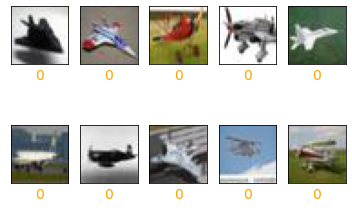

[0 1 2 3 4 5 6 7 8 9]


In [25]:
#불러온 데이터 셋 살펴보기
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    ax=plt.subplot(2,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    ax.xaxis.label.set_color("orange")
    ax.xaxis.label.set_fontsize(14)
    plt.xlabel(train_labels[i][0])
plt.show()
print(np.unique(train_labels))

## 데이터 셋 준비

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
X_test = test_images

print("X_train Shape : ",X_train.shape)
print("X_val Shape : ", X_val.shape)
print("X_test Shape : ",X_test.shape)

X_train Shape :  (40000, 32, 32, 3)
X_val Shape :  (10000, 32, 32, 3)
X_test Shape :  (10000, 32, 32, 3)


이미지의 RGB 채널은 각각 0~255까지의 값을 가지고 있기 때문에  
255를 눈어 0에서 1사이의 값을 갖도록 정규화(normalization) 시켜줍니다.

In [27]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

## CNN 모델 설계

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(tf.__version__)
print(device_lib.list_local_devices())
print("NUM GPUs Available : ", len(tf.config.list_physical_devices("GPU")))

2.6.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6138620074477659228
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4160159744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15457111082069233540
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:29:00.0, compute capability: 7.5"
]
NUM GPUs Available :  1
